In [1]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical #np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = to_categorical(y_train) 
y_TestOneHot = to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=1, batch_size=800, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = np.argmax(model.predict(X), axis=-1)
# get prediction result
print(predictions)

c:\Users\linchao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 2s - 38ms/step - accuracy: 0.8174 - loss: 0.7601 - val_accuracy: 0.9121 - val_loss: 0.3199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.3773

	[Info] Accuracy of testing data = 91.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[7 2 1 0 4 1 4 9 6 9]


顯示 第一筆訓練資料的圖形，確認是否正確

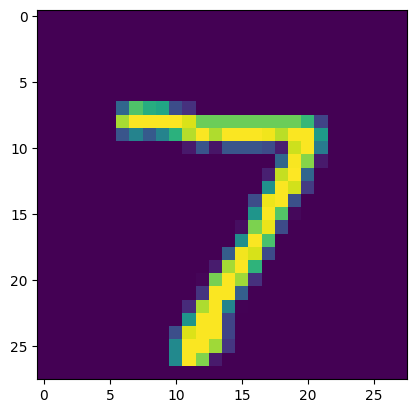

In [2]:
plt.imshow(X_test[0])
plt.show() 

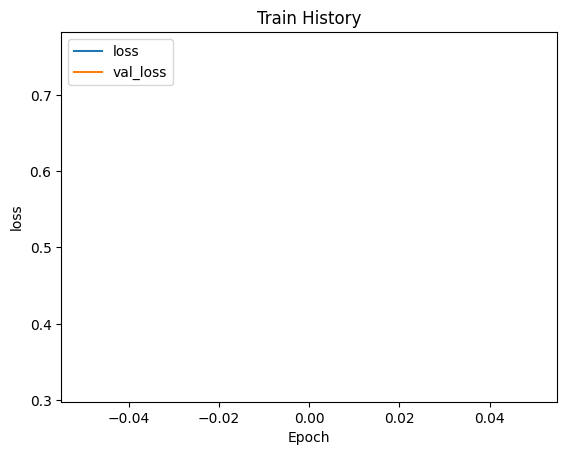

In [3]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

Activation Function有很多種，可依據問題的本質，挑選適合的函數訓練模型，請參閱下圖，Sigmoid 函數就能使Y的範圍限制在[0,1]之間，中間只有一小段模糊地帶，適合用於二分法(真或偽)，另外 softmax 函數，可以將Y轉為機率值，且所有類別的機率總和等於1，就適合多分類，最大值就代表可能性最大；上次還有用到 relu函數，它是忽視負值，Y的範圍限制在[0, ∞]之間，還有其他函數，就是依照資料及模型的特性挑選就對了
![](../resource/hand_writting_1.png)

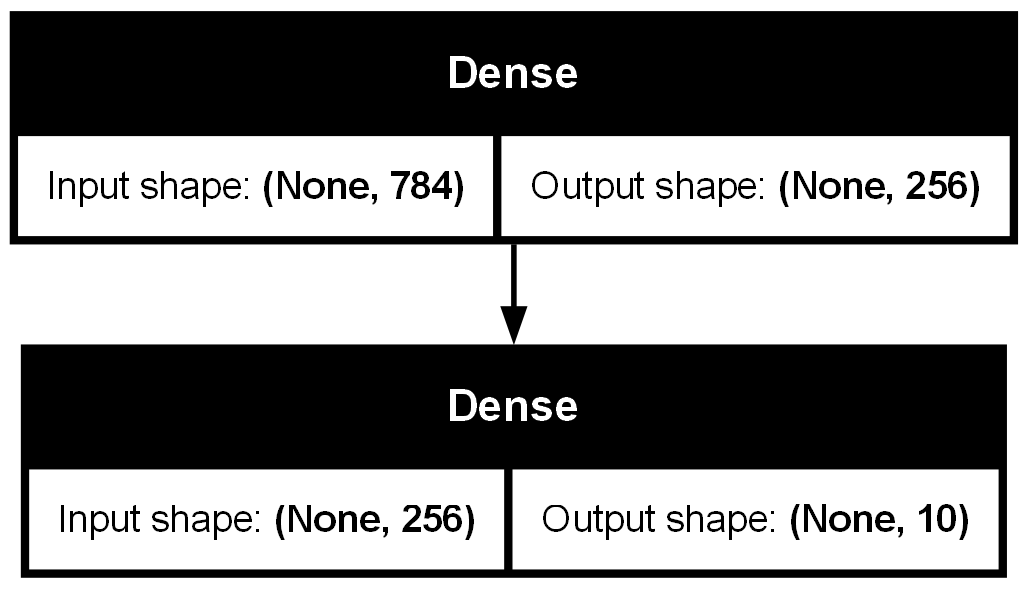

In [4]:
import keras
dot_img_file = '../resource/model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)